In [21]:
# problem 1: Let's make a deal
import random
from numpy import arange
from pylab import plot,xlabel,ylabel,show, legend, title
count = 0
total_times = 0
for i in range(0,1000):
    doors = [1,2,3]
#first assign the prize to a door
    prize_assign = random.randint(1,3)
#the contestant picks the door they want
    contestant_pick = random.randint(1,3)
#remove the wrong door
    doors_left = []
    if prize_assign == contestant_pick: #if the prize is behind the contestant's door, open either two doors
        doors.remove(prize_assign) #removes the door with the prize from the doors list, but since the contestant picked
        #the door with the prize, the contestant's door choice is also removed. Now there are two doors left to choose from
        #and both these doors have nothing behind them. 
        a = doors[0]
        b = doors[1]
        
        random_door_to_remove = random.randint(a,b) #pick a random door in the range of the two doors left
        while random_door_to_remove not in doors: #if the random pick is not in the range, let's say the contestant picked
            #door 2 and the prize is behind door 2, the contestant is left with doors 1 and 3. The random.randint(1,3) says to 
            #pick a random value between 1 and 3. It could be 2 to remove but 2 was already selected by the contestant. Therefore,
            #while the random integer is not in the doors list, keep choosing a new random integer until it is in the list
            random_door_to_remove = random.randint(a,b)   

        remove_doors = doors.remove(random_door_to_remove) #remove that randomly selected door so all that is left is the door
        #the constestant picked (which has the prize) and the one door with nothing.
        doors_left.append(contestant_pick)
        doors_left.append(doors[0])
    #doors left holds the doors to choose from
    else: #prize is not behind contestant's door, so the only option is to remove the door the contestant did not pick 
        #and the door without the prize
        doors_left.append(contestant_pick)
        doors_left.append(prize_assign)
        doors_left.sort() #just to get everything in numerical order for switching code later on
    #keep the door for half the time
    if i <= 499:
        if contestant_pick == prize_assign:
            count +=1
        
#switch the door the contestant choose, doors_left has the two doors left, go ahead and remove the contestant's pick from list

    else:    
        doors_left.remove(contestant_pick)
        new_door = doors_left[0]
        if new_door == prize_assign:
            total_times +=1
        
switch_probability = (total_times/500)*100
keep_probability = (count/500)*100
print("Probability of winning prize if you keep your door:"+" "+str(round(keep_probability,2))+"%")
print("Probability of winning prize if you switch your door choice:"+" "+ str(round(switch_probability,2))+"%")


Probability of winning prize if you keep your door: 32.2%
Probability of winning prize if you switch your door choice: 68.0%


In [22]:
from random import random
#PART A: 209 Pb
# Constants
NPb = 10000            # Initial Number of lead atoms
NBi_209 = 0               # Number of bismuth-209
tau = 3.3*60        # Half life of lead in seconds
h = 1.0               # Size of time-step in seconds
p = 1 - 2**(-h/tau)   # Probability of decay in one step
tmax = 20000           # Total time in seconds

# Lists of plot points
tpoints = arange(0.0,tmax,h) # make time array
Pbpoints = [] # empty array to store # of Pb atoms at each time step
Bi_209points = [] # empty array to store # of Bi-209 atoms at each time step

# Main loop
for t in tpoints:    # for time 0-20000 sec
    Pbpoints.append(NPb) # append starting # of Tl atoms, current value of atoms
    Bi_209points.append(NBi_209) # append starting # of Pb atoms

    # Calculate the number of atoms that decay
    decay = 0 #by default nothing decays
    for i in range(NPb): # determine number of atoms that decay 
        if random() < p: #p is probability between 0 and 1
            decay += 1 #decays if less than probability
    NPb -= decay # subtract number of decayed Parent atoms 
    NBi_209 += decay # add number of decayed Daughter atoms 
print(NPb, NBi_209)

0 10000


In [22]:
#PART B: 209 Tl
NTh = 209            # Initial Number of Thallium atoms, at most because 2.09% goes decays this way
NPb = 9791               # Number of lead# at max because 97.91% decays this way
tau = 2.2*60        # Half life of lead in seconds
h = 1.0               # Size of time-step in seconds
p = 1 - 2**(-h/tau)   # Probability of decay in one step
tmax = 20000           # Total time in seconds

# Lists of plot points
tpoints = arange(0.0,tmax,h) # make time array
Thpoints = [] # empty array to store # of Th atoms at each time step
Pbpoints = [] # empty array to store # of Pb atoms at each time step

# Main loop
for t in tpoints:    # for time 0-20000 sec
    Thpoints.append(NTh) # append starting # of Tl atoms, current value of atoms
    Pbpoints.append(NPb) # append starting # of Pb atoms

    # Calculate the number of atoms that decay
    decay = 0 #by default nothing decays
    for i in range(NTh): # determine number of atoms that decay 
        if random() < p: #p is probability between 0 and 1
            decay += 1 #decays if less than probability
    NTh -= decay # subtract number of decayed Parent atoms 
    NPb += decay # add number of decayed Daughter atoms 
print(NTh, NPb)

0 10000


In [55]:
#PART C: 213 Bi
NBi = 10000             # Initial Number of Bismuth 213 atoms
NPb = 0               # Number of lead
NTh = 0               # Number of Thallium

tau = 46*60        # Half life of Bismuth in seconds
h = 1.0               # Size of time-step in seconds
p = 1 - 2**(-h/tau)   # Probability of decay in one step
p_Pb = 97.91/100  # Probability that the atoms decay to lead
p_Th = 2.09/100  # Probability that the atoms decay to thallium
tmax = 20000           # Total time

# Lists of plot points
tpoints = arange(0.0,tmax,h) # make time array
Bipoints = [] # empty array to store # of Bi atoms at each time step
Pbpoints = [] # empty array to store # of Pb atoms at each time step
Thpoints = [] # empty array to store # of Th atoms at each time step
# Main loop
for t in tpoints:    # for time 0-20000 sec
    Bipoints.append(NBi) # append starting # of Bi atoms, current value of atoms
    Pbpoints.append(NPb) # append starting # of Pb atoms
    Thpoints.append(NTh) # append starting # of Th atoms
    # Calculate the number of atoms that decay
    decay_Pb = 0 #by default nothing decays to lead
    decay_Th = 0 #nothing decays to thallium
    for i in range(NBi):# determine the number of atoms that decay
        if random() < p: #it decays
            if random() < p_Th:
                decay_Th +=1
            else:
                decay_Pb +=1

            
    #need to subtract the decayed lead and thallium atoms
    NBi -= decay_Pb
    NBi -= decay_Th
    
    NTh += decay_Th 
    NPb += decay_Pb # add number of decayed Daughter atoms 
print(NBi, NTh, NPb)

60 200 9740


In [56]:
#combine the three parts together into one decay process, working from bottom up
NBi = 10000             # Initial Number of Bismuth atoms, 213 isotope
NPb = 0               # Number of lead
NTh = 0               # Number of Thallium
NBi_209 = 0

tau = 46*60        # Half life of Bismuth in seconds
tau_2 = 2.2*60     # half life of thallium
tau_3 = 3.3*60     #half life of lead

h = 1.0               # Size of time-step in seconds
p = 1 - 2**(-h/tau)   # Probability of decay in one step
p_Pb = 97.91/100  # Probability that the atoms decay to lead
p_Th = 2.09/100   # Probability that the atoms decay to thallium
p_th_Pb = 1-2**(-h/tau_2) #probability that thallium atoms decay to lead
p_Bi_209 = 1 - 2**(-h/tau_3) #probability that lead decay to Bi-209
tmax = 20000           # Total time

# Lists of plot points
tpoints = arange(0.0,tmax,h) # make time array

Bipoints = [] # empty array to store # of Bi atoms at each time step
Pbpoints = [] # empty array to store # of Pb atoms at each time step
Thpoints = [] # empty array to store # of Th atoms at each time step
Bi_209_points = [] #array to store # of Bi_209 atoms
# Main loop
for t in tpoints:  
    Bipoints.append(NBi) 
    Pbpoints.append(NPb) 
    Thpoints.append(NTh) 
    Bi_209_points.append(NBi_209)

    decay_Pb = 0 
    decay_Th = 0
    decay_Bi_209 = 0
    
    for i in range(NBi):  
        if random() < p: #it decays
            if random() < p_Th:
                decay_Th +=1
            else:
                decay_Pb +=1

  
    NBi -= decay_Pb
    NBi -= decay_Th
    
    NTh += decay_Th 
    NPb += decay_Pb  

    decay_Th = 0 #has to be zero again because we are essentially starting from the beginning for thallium
    #we are starting from zero because we don't know how many atoms will decay 
    #from thallium to lead
    for i in range(NTh): 
        if random() < p_th_Pb: 
            decay_Th += 1 
    NTh -= decay_Th 
    NPb += decay_Th  

    
    for i in range(NPb): 
        if random() < p_Bi_209: 
            decay_Bi_209 += 1 
    NPb -= decay_Bi_209 
    NBi_209 += decay_Bi_209 
print(NBi, NPb, NTh, NBi_209, NBi+NPb+NTh+NBi_209)


72 1 0 9927 10000


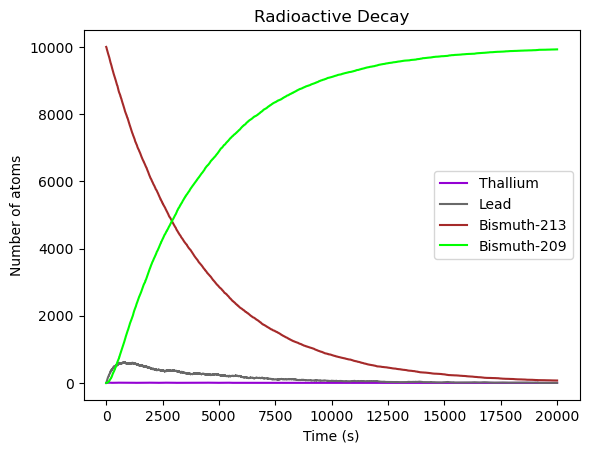

In [60]:
#make the plot

plot(tpoints,Thpoints, c='darkviolet', label = "Thallium") # plot Tl vs. time
plot(tpoints,Pbpoints, c='dimgray', label = "Lead") # plot Pb vs. time
plot(tpoints,Bipoints, c='brown', label = "Bismuth-213") # plot Bi_213 vs. time
plot(tpoints,Bi_209_points, c='lime', label = "Bismuth-209") # plot Bi_209 vs. time

xlabel("Time (s)")
ylabel("Number of atoms")
legend()
title ("Radioactive Decay")
show()
